In [19]:
# useful additional packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import numpy as np
import networkx as nx

from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit.optimization.applications.ising import max_cut, tsp
from qiskit.aqua.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.aqua.components.optimizers import SPSA
from qiskit.aqua import aqua_globals
from qiskit.aqua import QuantumInstance
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit.optimization.algorithms import MinimumEigenOptimizer
from qiskit.optimization.converters import IsingToQuadraticProgram
from qiskit.optimization.problems import QuadraticProgram

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

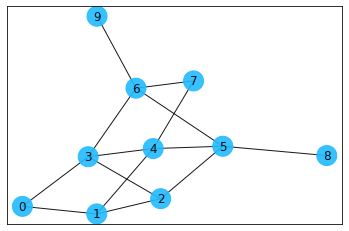

In [3]:
# Generating a graph of 4 nodes 
# Generating a graph of n nodes

n=10 # Number of nodes in graph
G=nx.Graph()
G.add_nodes_from(np.arange(0,n,1))
# tuple is (i,j,weight) where (i,j) is the edge
elist=[(0,1,1.0),(0,3,1.0),
       (1,2,1.0),(1,4,1.0),
       (2,3,1.0),(2,5,1.0),
      (3,4,1.0),(3,6,1.0),
      (4,5,1.0),(4,7,1.0),
      (5,6,1.0),(5,8,1.0),
      (6,7,1.0),(6,9,1.0)]
G.add_weighted_edges_from(elist)

colors = ['#22bbff' for node in G.nodes()]
pos = nx.spring_layout(G)
default_axes = plt.axes(frameon=True)
nx.draw_networkx(G, node_color=colors, node_size=400, alpha=.9, ax=default_axes, pos=pos)

In [4]:
#The weight matrix from the graph
w = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i,j] = temp['weight'] 
print(w)

[[0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


case = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 2.0
case = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 3.0
case = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 3.0
case = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] cost = 3.0
case = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0] cost = 5.0
case = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0] cost = 4.0
case = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0] cost = 4.0
case = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] cost = 4.0
case = [1, 0, 0, 1, 0, 0, 0, 0, 0, 0] cost = 4.0
case = [0, 1, 0, 1, 0, 0, 0, 0, 0, 0] cost = 7.0
case = [1, 1, 0, 1, 0, 0, 0, 0, 0, 0] cost = 5.0
case = [0, 0, 1, 1, 0, 0, 0, 0, 0, 0] cost = 5.0
case = [1, 0, 1, 1, 0, 0, 0, 0, 0, 0] cost = 5.0
case = [0, 1, 1, 1, 0, 0, 0, 0, 0, 0] cost = 6.0
case = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0] cost = 4.0
case = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0] cost = 4.0
case = [1, 0, 0, 0, 1, 0, 0, 0, 0, 0] cost = 6.0
case = [0, 1, 0, 0, 1, 0, 0, 0, 0, 0] cost = 5.0
case = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0] cost = 5.0
case = [0, 0, 1, 0, 

case = [0, 0, 1, 1, 1, 0, 0, 1, 0, 1] cost = 8.0
case = [1, 0, 1, 1, 1, 0, 0, 1, 0, 1] cost = 8.0
case = [0, 1, 1, 1, 1, 0, 0, 1, 0, 1] cost = 7.0
case = [1, 1, 1, 1, 1, 0, 0, 1, 0, 1] cost = 5.0
case = [0, 0, 0, 0, 0, 1, 0, 1, 0, 1] cost = 7.0
case = [1, 0, 0, 0, 0, 1, 0, 1, 0, 1] cost = 9.0
case = [0, 1, 0, 0, 0, 1, 0, 1, 0, 1] cost = 10.0
case = [1, 1, 0, 0, 0, 1, 0, 1, 0, 1] cost = 10.0
case = [0, 0, 1, 0, 0, 1, 0, 1, 0, 1] cost = 8.0
case = [1, 0, 1, 0, 0, 1, 0, 1, 0, 1] cost = 10.0
case = [0, 1, 1, 0, 0, 1, 0, 1, 0, 1] cost = 9.0
case = [1, 1, 1, 0, 0, 1, 0, 1, 0, 1] cost = 9.0
case = [0, 0, 0, 1, 0, 1, 0, 1, 0, 1] cost = 11.0
case = [1, 0, 0, 1, 0, 1, 0, 1, 0, 1] cost = 11.0
case = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1] cost = 14.0
case = [1, 1, 0, 1, 0, 1, 0, 1, 0, 1] cost = 12.0
case = [0, 0, 1, 1, 0, 1, 0, 1, 0, 1] cost = 10.0
case = [1, 0, 1, 1, 0, 1, 0, 1, 0, 1] cost = 10.0
case = [0, 1, 1, 1, 0, 1, 0, 1, 0, 1] cost = 11.0
case = [1, 1, 1, 1, 0, 1, 0, 1, 0, 1] cost = 9.0
case = [0,

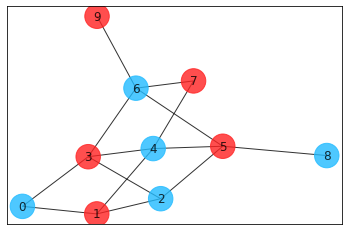

In [5]:
#Brute force approach
#We try all possible 2^n combinations = 864 combinations
best_cost_brute = 0

for b in range(2**n):
    #Convert b to 8-bit binary - i.e, for b = 200, it is 0b11001000
    binary_b=bin(b)
    #we cut only the last 8 bit - then zfill (fill with 0 in front) it to make it n bit
    #so that it looks like 0011001000
    binary_b=binary_b[2:].zfill(n)
    #make binary_b a list - ['0', '0', '1', '1', '0', '0', '1', '0', '0', '0']
    binary_b = list(binary_b)
    #Now reverse the list - 
    #each element of this reversed list is my x
    binary_b = reversed(binary_b)
    #x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    x = [int(t) for t in binary_b]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i,j]*x[i]*(1-x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x 
    print('case = ' + str(x)+ ' cost = ' + str(cost))

colors = ['#ff2222' if xbest_brute[i] == 0 else '#22bbff' for i in range(n)]
nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, pos=pos)
print('\nBest solution = ' + str(xbest_brute) + ' cost = ' + str(best_cost_brute))    

In [9]:
#Mapping to the Ising problem

qubitOp, offset = max_cut.get_operator(w)
print('Offset:', offset)
print('Ising Hamiltonian:')
print(qubitOp.print_details())

Offset: -7.0
Ising Hamiltonian:
IIIIIIIIZZ	(0.5+0j)
IIIIIIIZZI	(0.5+0j)
IIIIIIZIIZ	(0.5+0j)
IIIIIIZZII	(0.5+0j)
IIIIIZIIZI	(0.5+0j)
IIIIIZZIII	(0.5+0j)
IIIIZIIZII	(0.5+0j)
IIIIZZIIII	(0.5+0j)
IIIZIIZIII	(0.5+0j)
IIIZZIIIII	(0.5+0j)
IIZIIZIIII	(0.5+0j)
IIZZIIIIII	(0.5+0j)
IZIIZIIIII	(0.5+0j)
ZIIZIIIIII	(0.5+0j)



In [11]:
# mapping Ising Hamiltonian to Quadratic Program
qp = QuadraticProgram()
qp.from_ising(qubitOp, offset)
qp.to_docplex().prettyprint()

// This file has been generated by DOcplex
// model name is: AnonymousModel
// single vars section
dvar bool x_0;
dvar bool x_1;
dvar bool x_2;
dvar bool x_3;
dvar bool x_4;
dvar bool x_5;
dvar bool x_6;
dvar bool x_7;
dvar bool x_8;
dvar bool x_9;

minimize
 [ - 2 x_0^2 + 2 x_0*x_1 + 2 x_0*x_3 - 3 x_1^2 + 2 x_1*x_2 + 2 x_1*x_4
 - 3 x_2^2 + 2 x_2*x_3 + 2 x_2*x_5 - 4 x_3^2 + 2 x_3*x_4 + 2 x_3*x_6 - 4 x_4^2
 + 2 x_4*x_5 + 2 x_4*x_7 - 4 x_5^2 + 2 x_5*x_6 + 2 x_5*x_8 - 4 x_6^2
 + 2 x_6*x_7 + 2 x_6*x_9 - 2 x_7^2 - x_8^2 - x_9^2 ];
 
subject to {

}


In [12]:
# solving Quadratic Program using exact classical eigensolver
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qp)
print(result)

optimal function value: -14.0
optimal value: [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
status: SUCCESS


energy: -7.0
max-cut objective: -14.0
solution: [0 1 0 1 0 1 0 1 0 1]
solution objective: 14.0


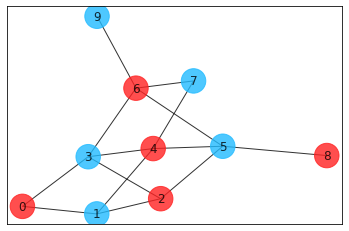

In [18]:
#Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
ee = NumPyMinimumEigensolver(qubitOp)
result = ee.run()

x = sample_most_likely(result.eigenstate)
print('energy:', result.eigenvalue.real)
print('max-cut objective:', result.eigenvalue.real + offset)
print('solution:', max_cut.get_graph_solution(x))
print('solution objective:', max_cut.max_cut_value(x, w))

colors = ['#ff2222' if max_cut.get_graph_solution(x)[i] == 0 else '#22bbff' for i in range(n)]
nx.draw_networkx(G, node_color=colors, node_size=600, alpha = .8, pos=pos)

In [16]:
#Running it on quantum computer
aqua_globals.random_seed = np.random.default_rng(123)
seed = 10598
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)

2020-09-19 16:26:45,352:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: 
==================== Setting of VQE ============================
Algorithm: VQE
-- max_evals_grouped: 1
-- circuit_sampler: <qiskit.aqua.operators.converters.circuit_sampler.CircuitSampler object at 0x00000206D2CC82E0>
-- expectation: <qiskit.aqua.operators.expectations.matrix_expectation.MatrixExpectation object at 0x00000206D2CD9640>
-- user_valid_expectation: False
-- include_custom: False
-- expect_op: None
-- operator: SummedOp([
  0.5 * IIIIIIIIZZ,
  0.5 * IIIIIIIZZI,
  0.5 * IIIIIIZIIZ,
  0.5 * IIIIIIZZII,
  0.5 * IIIIIZIIZI,
  0.5 * IIIIIZZIII,
  0.5 * IIIIZIIZII,
  0.5 * IIIIZZIIII,
  0.5 * IIIZIIZIII,
  0.5 * IIIZZIIIII,
  0.5 * IIZIIZIIII,
  0.5 * IIZZIIIIII,
  0.5 * IZIIZIIIII,
  0.5 * ZIIZIIIIII
])
-- quantum_instance: 
Qiskit Terra version: 0.15.2
Backend: 'statevector_simulator (AerProvider)', with following setting:
{'basis_gates': ['u1', 'u2', 'u3', 'cx', 'cz', 'id', 'x', 'y', 'z', 'h', 's'

2020-09-19 16:26:45,352:qiskit.aqua.algorithms.vq_algorithm:INFO: Starting optimizer.
bounds=[(None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None)]
initial point=[-1.36422185  2.67066493  5.3343725  -0.80042623  1.

2020-09-19 16:26:47,768:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [0.02900426] - 19.98949 (ms), eval count: 35
2020-09-19 16:26:47,790:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [0.43172745] - 19.98854 (ms), eval count: 36
2020-09-19 16:26:47,813:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [0.27543853] - 19.98758 (ms), eval count: 37
2020-09-19 16:26:47,834:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [0.20887054] - 18.98789 (ms), eval count: 38
2020-09-19 16:26:47,856:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [0.19708184] - 21.16370 (ms), eval count: 39
2020-09-19 16:26:47,872:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [0.35384081] - 15.63668 (ms), eval count: 40
2020-09-19 16:26:47,872:qiskit.aqua.components.optimizers.spsa:DEBUG: calibration step # 20 of

2020-09-19 16:26:48,674:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-0.91000667] - 15.63573 (ms), eval count: 72
2020-09-19 16:26:48,674:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 10: -0.7695333
2020-09-19 16:26:48,674:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 10: -0.9100067
2020-09-19 16:26:48,705:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-0.99160004] - 31.25024 (ms), eval count: 73
2020-09-19 16:26:48,736:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-0.71764744] - 31.24690 (ms), eval count: 74
2020-09-19 16:26:48,736:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 11: -0.9916000
2020-09-19 16:26:48,736:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 11: -0.7176474
2020-09-19 16:26:48,759:qiskit.aqua.algorith

2020-09-19 16:26:49,438:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-1.17435898] - 31.25095 (ms), eval count: 102
2020-09-19 16:26:49,438:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 25: -1.7377252
2020-09-19 16:26:49,438:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 25: -1.1743590
2020-09-19 16:26:49,460:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-1.35283025] - 22.12501 (ms), eval count: 103
2020-09-19 16:26:49,476:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-1.17183369] - 15.63025 (ms), eval count: 104
2020-09-19 16:26:49,476:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 26: -1.3528303
2020-09-19 16:26:49,476:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 26: -1.1718337
2020-09-19 16:26:49,507:qiskit.aqua.algor

2020-09-19 16:26:50,211:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-1.96212742] - 31.24237 (ms), eval count: 132
2020-09-19 16:26:50,211:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 40: -1.9341173
2020-09-19 16:26:50,211:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 40: -1.9621274
2020-09-19 16:26:50,227:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-2.03264181] - 15.62333 (ms), eval count: 133
2020-09-19 16:26:50,258:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-1.88630073] - 31.24928 (ms), eval count: 134
2020-09-19 16:26:50,258:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 41: -2.0326418
2020-09-19 16:26:50,258:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 41: -1.8863007
2020-09-19 16:26:50,277:qiskit.aqua.algor

2020-09-19 16:26:50,963:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-1.88574048] - 22.13264 (ms), eval count: 162
2020-09-19 16:26:50,963:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 55: -2.2967267
2020-09-19 16:26:50,963:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 55: -1.8857405
2020-09-19 16:26:50,995:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-1.97115184] - 31.25644 (ms), eval count: 163
2020-09-19 16:26:51,010:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-2.1184002] - 15.62262 (ms), eval count: 164
2020-09-19 16:26:51,010:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 56: -1.9711518
2020-09-19 16:26:51,026:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 56: -2.1184002
2020-09-19 16:26:51,041:qiskit.aqua.algori

2020-09-19 16:26:51,712:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-2.54178991] - 15.62333 (ms), eval count: 192
2020-09-19 16:26:51,728:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 70: -2.9111492
2020-09-19 16:26:51,728:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 70: -2.5417899
2020-09-19 16:26:51,743:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-2.52610219] - 15.62619 (ms), eval count: 193
2020-09-19 16:26:51,765:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-2.95451463] - 22.12787 (ms), eval count: 194
2020-09-19 16:26:51,765:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 71: -2.5261022
2020-09-19 16:26:51,781:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 71: -2.9545146
2020-09-19 16:26:51,797:qiskit.aqua.algor

2020-09-19 16:26:52,568:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-2.9059371] - 22.13120 (ms), eval count: 222
2020-09-19 16:26:52,568:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 85: -2.9413267
2020-09-19 16:26:52,568:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 85: -2.9059371
2020-09-19 16:26:52,599:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-2.74129047] - 15.62595 (ms), eval count: 223
2020-09-19 16:26:52,630:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-2.89268799] - 31.24714 (ms), eval count: 224
2020-09-19 16:26:52,630:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 86: -2.7412905
2020-09-19 16:26:52,630:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 86: -2.8926880
2020-09-19 16:26:52,646:qiskit.aqua.algori

2020-09-19 16:26:53,385:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.48468712] - 15.63144 (ms), eval count: 252
2020-09-19 16:26:53,401:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 100: -3.1970842
2020-09-19 16:26:53,401:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 100: -3.4846871
2020-09-19 16:26:53,416:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.20953223] - 15.62524 (ms), eval count: 253
2020-09-19 16:26:53,448:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.42013683] - 31.24809 (ms), eval count: 254
2020-09-19 16:26:53,448:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 101: -3.2095322
2020-09-19 16:26:53,448:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 101: -3.4201368
2020-09-19 16:26:53,470:qiskit.aqua.a

2020-09-19 16:26:54,149:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.06841998] - 31.24928 (ms), eval count: 281
2020-09-19 16:26:54,171:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.17123979] - 22.13955 (ms), eval count: 282
2020-09-19 16:26:54,171:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 115: -4.0684200
2020-09-19 16:26:54,171:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 115: -4.1712398
2020-09-19 16:26:54,203:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.3186213] - 31.25501 (ms), eval count: 283
2020-09-19 16:26:54,218:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.97156225] - 15.62691 (ms), eval count: 284
2020-09-19 16:26:54,218:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 116: -4.3186213
2020-09-19 

2020-09-19 16:26:54,905:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 129: -3.7962387
2020-09-19 16:26:54,932:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.9810326] - 25.98357 (ms), eval count: 311
2020-09-19 16:26:54,953:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.67652408] - 19.98949 (ms), eval count: 312
2020-09-19 16:26:54,954:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 130: -3.9810326
2020-09-19 16:26:54,955:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 130: -3.6765241
2020-09-19 16:26:54,979:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.91703534] - 22.07851 (ms), eval count: 313
2020-09-19 16:26:54,994:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.68952823] - 15.62834 (ms), eval count: 314
2020-09-19 

2020-09-19 16:26:55,689:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 144: -3.8704624
2020-09-19 16:26:55,689:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 144: -3.4760504
2020-09-19 16:26:55,705:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.75153841] - 15.62190 (ms), eval count: 341
2020-09-19 16:26:55,736:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.65683733] - 15.62786 (ms), eval count: 342
2020-09-19 16:26:55,736:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 145: -3.7515384
2020-09-19 16:26:55,736:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 145: -3.6568373
2020-09-19 16:26:55,768:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.03844891] - 31.24332 (ms), eval count: 343
2020-09-19 16:26:55,790:qiskit.aqua.a

2020-09-19 16:26:56,454:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.15183767] - 15.62262 (ms), eval count: 370
2020-09-19 16:26:56,454:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 159: -3.5768861
2020-09-19 16:26:56,469:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 159: -4.1518377
2020-09-19 16:26:56,492:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.29738811] - 22.14575 (ms), eval count: 371
2020-09-19 16:26:56,507:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.9764476] - 15.61904 (ms), eval count: 372
2020-09-19 16:26:56,507:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 160: -4.2973881
2020-09-19 16:26:56,507:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 160: -3.9764476
2020-09-19 16:26:56,538:qiskit.aqua.al

2020-09-19 16:26:57,225:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.47424623] - 15.62119 (ms), eval count: 399
2020-09-19 16:26:57,256:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.24628772] - 31.25000 (ms), eval count: 400
2020-09-19 16:26:57,256:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 174: -4.4742462
2020-09-19 16:26:57,256:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 174: -4.2462877
2020-09-19 16:26:57,278:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.32553193] - 22.13168 (ms), eval count: 401
2020-09-19 16:26:57,309:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.5065747] - 31.25858 (ms), eval count: 402
2020-09-19 16:26:57,309:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 175: -4.3255319
2020-09-19 

2020-09-19 16:26:57,995:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 188: -3.8303806
2020-09-19 16:26:58,027:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.0922588] - 31.24833 (ms), eval count: 429
2020-09-19 16:26:58,042:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.42421356] - 15.62762 (ms), eval count: 430
2020-09-19 16:26:58,042:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 189: -4.0922588
2020-09-19 16:26:58,042:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 189: -3.4242136
2020-09-19 16:26:58,074:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.35221393] - 31.24714 (ms), eval count: 431
2020-09-19 16:26:58,096:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.36943163] - 15.63144 (ms), eval count: 432
2020-09-19 

2020-09-19 16:26:58,844:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 203: -4.4728262
2020-09-19 16:26:58,844:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 203: -5.1500212
2020-09-19 16:26:58,886:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.0181985] - 41.34846 (ms), eval count: 459
2020-09-19 16:26:58,909:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.58761065] - 20.98823 (ms), eval count: 460
2020-09-19 16:26:58,910:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 204: -5.0181985
2020-09-19 16:26:58,910:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 204: -4.5876107
2020-09-19 16:26:58,935:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.11233116] - 23.98634 (ms), eval count: 461
2020-09-19 16:26:58,957:qiskit.aqua.al

2020-09-19 16:26:59,652:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.55443023] - 25.99359 (ms), eval count: 488
2020-09-19 16:26:59,654:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 218: -5.2443183
2020-09-19 16:26:59,655:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 218: -4.5544302
2020-09-19 16:26:59,680:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.62655965] - 23.98682 (ms), eval count: 489
2020-09-19 16:26:59,709:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.93051446] - 26.98421 (ms), eval count: 490
2020-09-19 16:26:59,710:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 219: -4.6265596
2020-09-19 16:26:59,711:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 219: -4.9305145
2020-09-19 16:26:59,740:qiskit.aqua.a

2020-09-19 16:27:00,430:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.49410613] - 21.98553 (ms), eval count: 517
2020-09-19 16:27:00,454:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.06372762] - 21.98720 (ms), eval count: 518
2020-09-19 16:27:00,455:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 233: -5.4941061
2020-09-19 16:27:00,456:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 233: -5.0637276
2020-09-19 16:27:00,481:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.25823091] - 22.98713 (ms), eval count: 519
2020-09-19 16:27:00,505:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.4025016] - 21.98672 (ms), eval count: 520
2020-09-19 16:27:00,506:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 234: -5.2582309
2020-09-19 

2020-09-19 16:27:01,182:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 247: -5.3765310
2020-09-19 16:27:01,198:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.181336] - 15.63311 (ms), eval count: 547
2020-09-19 16:27:01,229:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.68552399] - 15.62452 (ms), eval count: 548
2020-09-19 16:27:01,229:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 248: -5.1813360
2020-09-19 16:27:01,229:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 248: -5.6855240
2020-09-19 16:27:01,260:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.50364903] - 31.24738 (ms), eval count: 549
2020-09-19 16:27:01,283:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.45617773] - 22.13264 (ms), eval count: 550
2020-09-19 1

2020-09-19 16:27:01,984:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 262: -5.5619358
2020-09-19 16:27:01,984:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 262: -5.5729406
2020-09-19 16:27:02,016:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.65164605] - 15.63096 (ms), eval count: 577
2020-09-19 16:27:02,047:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.55249459] - 31.23784 (ms), eval count: 578
2020-09-19 16:27:02,047:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 263: -5.6516461
2020-09-19 16:27:02,047:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 263: -5.5524946
2020-09-19 16:27:02,063:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.70090491] - 15.62428 (ms), eval count: 579
2020-09-19 16:27:02,100:qiskit.aqua.a

2020-09-19 16:27:02,749:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.92180139] - 15.61761 (ms), eval count: 606
2020-09-19 16:27:02,764:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 277: -5.5869506
2020-09-19 16:27:02,764:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 277: -5.9218014
2020-09-19 16:27:02,787:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.6847474] - 22.14503 (ms), eval count: 607
2020-09-19 16:27:02,802:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.82399376] - 15.63430 (ms), eval count: 608
2020-09-19 16:27:02,818:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 278: -5.6847474
2020-09-19 16:27:02,818:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 278: -5.8239938
2020-09-19 16:27:02,833:qiskit.aqua.al

2020-09-19 16:27:03,604:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.87127924] - 15.63334 (ms), eval count: 635
2020-09-19 16:27:03,636:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.54525006] - 31.24690 (ms), eval count: 636
2020-09-19 16:27:03,636:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 292: -5.8712792
2020-09-19 16:27:03,636:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 292: -5.5452501
2020-09-19 16:27:03,651:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.71941484] - 15.62381 (ms), eval count: 637
2020-09-19 16:27:03,682:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.91804833] - 15.62190 (ms), eval count: 638
2020-09-19 16:27:03,682:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 293: -5.7194148
2020-09-19

energy: -6.038345244403427
time: 18.668972730636597
max-cut objective: -13.038345244403427
solution: [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
solution objective: 14.0


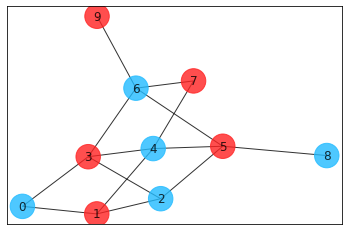

In [20]:
# construct VQE
spsa = SPSA(maxiter=300)
ry = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=5, entanglement='linear')
vqe = VQE(qubitOp, ry, spsa, quantum_instance=quantum_instance)

# run VQE
result = vqe.run(quantum_instance)

# print results
x = sample_most_likely(result.eigenstate)
print('energy:', result.eigenvalue.real)
print('time:', result.optimizer_time)
print('max-cut objective:', result.eigenvalue.real + offset)
print('solution:', max_cut.get_graph_solution(x))
print('solution objective:', max_cut.max_cut_value(x, w))

# plot results
colors = ['#ff2222' if max_cut.get_graph_solution(x)[i] == 0 else '#22bbff' for i in range(n)]
nx.draw_networkx(G, node_color=colors, node_size=600, alpha = .8, pos=pos)

2020-09-19 16:40:52,925:qiskit.aqua.algorithms.vq_algorithm:INFO: Starting optimizer.
bounds=[(None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None)]
initial point=[-4.11655915  3.12591415 -0.11047802 -6.12822014  5.

2020-09-19 16:40:56,232:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-0.27486438] - 46.87190 (ms), eval count: 34
2020-09-19 16:40:56,254:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-0.21627266] - 22.15862 (ms), eval count: 35
2020-09-19 16:40:56,285:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-0.33264713] - 31.23784 (ms), eval count: 36
2020-09-19 16:40:56,317:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-0.38105411] - 31.24452 (ms), eval count: 37
2020-09-19 16:40:56,339:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-0.20129308] - 22.13144 (ms), eval count: 38
2020-09-19 16:40:56,370:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-0.06135201] - 31.25811 (ms), eval count: 39
2020-09-19 16:40:56,401:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy ev

2020-09-19 16:40:57,172:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [0.38899297] - 31.25596 (ms), eval count: 71
2020-09-19 16:40:57,188:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [0.01954951] - 15.62428 (ms), eval count: 72
2020-09-19 16:40:57,188:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 10: 0.3889930
2020-09-19 16:40:57,188:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 10: 0.0195495
2020-09-19 16:40:57,219:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [0.3957052] - 31.24809 (ms), eval count: 73
2020-09-19 16:40:57,241:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [0.27142631] - 22.12620 (ms), eval count: 74
2020-09-19 16:40:57,241:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 11: 0.3957052
2020-09-19 16:40:57,241:q

2020-09-19 16:40:57,916:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-1.33591042] - 15.62428 (ms), eval count: 101
2020-09-19 16:40:57,943:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-0.8720796] - 26.63279 (ms), eval count: 102
2020-09-19 16:40:57,943:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 25: -1.3359104
2020-09-19 16:40:57,943:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 25: -0.8720796
2020-09-19 16:40:57,974:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-1.42960009] - 31.25501 (ms), eval count: 103
2020-09-19 16:40:57,990:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-1.45552536] - 15.62524 (ms), eval count: 104
2020-09-19 16:40:57,990:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 26: -1.4296001
2020-09-19 16:

2020-09-19 16:40:58,723:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 39: -1.7174260
2020-09-19 16:40:58,745:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-1.68031861] - 22.12238 (ms), eval count: 131
2020-09-19 16:40:58,776:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-1.8447905] - 31.26121 (ms), eval count: 132
2020-09-19 16:40:58,776:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 40: -1.6803186
2020-09-19 16:40:58,776:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 40: -1.8447905
2020-09-19 16:40:58,792:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-1.96422442] - 15.61832 (ms), eval count: 133
2020-09-19 16:40:58,823:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-1.57915579] - 15.63048 (ms), eval count: 134
2020-09-19 16:

2020-09-19 16:40:59,594:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 54: -2.2748595
2020-09-19 16:40:59,594:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 54: -2.0086125
2020-09-19 16:40:59,625:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-2.25007945] - 31.24857 (ms), eval count: 161
2020-09-19 16:40:59,647:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-2.26919519] - 22.12954 (ms), eval count: 162
2020-09-19 16:40:59,647:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 55: -2.2500795
2020-09-19 16:40:59,663:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 55: -2.2691952
2020-09-19 16:40:59,679:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-2.02927012] - 15.62524 (ms), eval count: 163
2020-09-19 16:40:59,694:qiskit.aqua.algor

2020-09-19 16:41:00,411:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 69: -2.5199189
2020-09-19 16:41:00,411:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 69: -2.8300769
2020-09-19 16:41:00,442:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-2.7600167] - 31.24690 (ms), eval count: 191
2020-09-19 16:41:00,464:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-2.83172205] - 15.63215 (ms), eval count: 192
2020-09-19 16:41:00,464:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 70: -2.7600167
2020-09-19 16:41:00,464:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 70: -2.8317221
2020-09-19 16:41:00,495:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-2.76719072] - 31.24881 (ms), eval count: 193
2020-09-19 16:41:00,511:qiskit.aqua.algori

2020-09-19 16:41:01,297:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 84: -3.5035788
2020-09-19 16:41:01,297:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 84: -2.5367033
2020-09-19 16:41:01,329:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.05374704] - 31.26287 (ms), eval count: 221
2020-09-19 16:41:01,351:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.32488808] - 22.11618 (ms), eval count: 222
2020-09-19 16:41:01,351:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 85: -3.0537470
2020-09-19 16:41:01,351:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 85: -3.3248881
2020-09-19 16:41:01,382:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.30968613] - 31.25381 (ms), eval count: 223
2020-09-19 16:41:01,413:qiskit.aqua.algor

2020-09-19 16:41:02,131:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 99: -3.1448121
2020-09-19 16:41:02,146:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 99: -3.4458143
2020-09-19 16:41:02,168:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.44206358] - 22.14646 (ms), eval count: 251
2020-09-19 16:41:02,184:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.21080146] - 15.62119 (ms), eval count: 252
2020-09-19 16:41:02,184:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 100: -3.4420636
2020-09-19 16:41:02,184:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 100: -3.2108015
2020-09-19 16:41:02,215:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.50028977] - 15.62524 (ms), eval count: 253
2020-09-19 16:41:02,247:qiskit.aqua.alg

2020-09-19 16:41:02,954:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.70417809] - 22.13049 (ms), eval count: 280
2020-09-19 16:41:02,954:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 114: -3.9110802
2020-09-19 16:41:02,954:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 114: -3.7041781
2020-09-19 16:41:02,985:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.93421371] - 31.25477 (ms), eval count: 281
2020-09-19 16:41:03,017:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-3.73047414] - 31.24738 (ms), eval count: 282
2020-09-19 16:41:03,017:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 115: -3.9342137
2020-09-19 16:41:03,017:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 115: -3.7304741
2020-09-19 16:41:03,032:qiskit.aqua.a

2020-09-19 16:41:03,733:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.1526841] - 15.62452 (ms), eval count: 309
2020-09-19 16:41:03,755:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.30857692] - 22.13168 (ms), eval count: 310
2020-09-19 16:41:03,755:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 129: -4.1526841
2020-09-19 16:41:03,755:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 129: -4.3085769
2020-09-19 16:41:03,787:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.42155885] - 31.25525 (ms), eval count: 311
2020-09-19 16:41:03,802:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.07837356] - 15.62190 (ms), eval count: 312
2020-09-19 16:41:03,818:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 130: -4.4215589
2020-09-19 

2020-09-19 16:41:04,487:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 143: -4.5516432
2020-09-19 16:41:04,518:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.36797954] - 15.61904 (ms), eval count: 339
2020-09-19 16:41:04,534:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.46275418] - 15.63907 (ms), eval count: 340
2020-09-19 16:41:04,534:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 144: -4.3679795
2020-09-19 16:41:04,534:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 144: -4.4627542
2020-09-19 16:41:04,572:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.51509622] - 37.75334 (ms), eval count: 341
2020-09-19 16:41:04,587:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.45897724] - 15.64050 (ms), eval count: 342
2020-09-19

2020-09-19 16:41:05,335:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 158: -4.8380334
2020-09-19 16:41:05,335:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 158: -4.2705425
2020-09-19 16:41:05,357:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.24354433] - 22.13645 (ms), eval count: 369
2020-09-19 16:41:05,372:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.37555464] - 15.63048 (ms), eval count: 370
2020-09-19 16:41:05,372:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 159: -4.2435443
2020-09-19 16:41:05,372:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 159: -4.3755546
2020-09-19 16:41:05,404:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.71263103] - 31.25215 (ms), eval count: 371
2020-09-19 16:41:05,419:qiskit.aqua.a

2020-09-19 16:41:06,074:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.42467278] - 22.14098 (ms), eval count: 398
2020-09-19 16:41:06,074:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 173: -4.9945876
2020-09-19 16:41:06,074:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 173: -4.4246728
2020-09-19 16:41:06,090:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.58305007] - 15.61975 (ms), eval count: 399
2020-09-19 16:41:06,121:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.77682482] - 31.24905 (ms), eval count: 400
2020-09-19 16:41:06,121:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 174: -4.5830501
2020-09-19 16:41:06,121:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 174: -4.7768248
2020-09-19 16:41:06,137:qiskit.aqua.a

2020-09-19 16:41:06,977:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-4.83660674] - 22.13740 (ms), eval count: 427
2020-09-19 16:41:06,992:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.264419] - 15.63382 (ms), eval count: 428
2020-09-19 16:41:07,008:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 188: -4.8366067
2020-09-19 16:41:07,008:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 188: -5.2644190
2020-09-19 16:41:07,023:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.1634784] - 15.62619 (ms), eval count: 429
2020-09-19 16:41:07,055:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.22240452] - 31.25310 (ms), eval count: 430
2020-09-19 16:41:07,055:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 189: -5.1634784
2020-09-19 16

2020-09-19 16:41:07,710:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 202: -5.2700513
2020-09-19 16:41:07,725:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.09045778] - 15.62643 (ms), eval count: 457
2020-09-19 16:41:07,757:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.386608] - 31.25167 (ms), eval count: 458
2020-09-19 16:41:07,757:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 203: -5.0904578
2020-09-19 16:41:07,763:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 203: -5.3866080
2020-09-19 16:41:07,779:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.1957237] - 15.63311 (ms), eval count: 459
2020-09-19 16:41:07,794:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.34156537] - 15.62333 (ms), eval count: 460
2020-09-19 16

2020-09-19 16:41:08,465:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 217: -5.2182380
2020-09-19 16:41:08,465:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 217: -5.5108174
2020-09-19 16:41:08,496:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.49678189] - 31.25358 (ms), eval count: 487
2020-09-19 16:41:08,512:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.29732373] - 15.62548 (ms), eval count: 488
2020-09-19 16:41:08,512:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 218: -5.4967819
2020-09-19 16:41:08,512:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 218: -5.2973237
2020-09-19 16:41:08,543:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.37025646] - 31.24952 (ms), eval count: 489
2020-09-19 16:41:08,565:qiskit.aqua.a

2020-09-19 16:41:09,298:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.47785465] - 31.26621 (ms), eval count: 516
2020-09-19 16:41:09,298:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 232: -5.3431216
2020-09-19 16:41:09,298:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 232: -5.4778546
2020-09-19 16:41:09,329:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.40757054] - 31.24690 (ms), eval count: 517
2020-09-19 16:41:09,345:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.3574779] - 15.61832 (ms), eval count: 518
2020-09-19 16:41:09,361:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 233: -5.4075705
2020-09-19 16:41:09,361:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 233: -5.3574779
2020-09-19 16:41:09,383:qiskit.aqua.al

2020-09-19 16:41:10,116:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.6367228] - 15.62405 (ms), eval count: 545
2020-09-19 16:41:10,147:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.5708819] - 31.24142 (ms), eval count: 546
2020-09-19 16:41:10,147:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 247: -5.6367228
2020-09-19 16:41:10,147:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 247: -5.5708819
2020-09-19 16:41:10,169:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.53566839] - 22.13931 (ms), eval count: 547
2020-09-19 16:41:10,201:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.59556183] - 31.25739 (ms), eval count: 548
2020-09-19 16:41:10,201:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 248: -5.5356684
2020-09-19 1

2020-09-19 16:41:10,887:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 261: -5.5377257
2020-09-19 16:41:10,918:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.72126238] - 31.25310 (ms), eval count: 575
2020-09-19 16:41:10,934:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.75850789] - 15.61499 (ms), eval count: 576
2020-09-19 16:41:10,934:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 262: -5.7212624
2020-09-19 16:41:10,934:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 262: -5.7585079
2020-09-19 16:41:10,965:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.85883419] - 15.62715 (ms), eval count: 577
2020-09-19 16:41:10,987:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.55997295] - 15.63334 (ms), eval count: 578
2020-09-19

2020-09-19 16:41:11,635:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 276: -5.8604167
2020-09-19 16:41:11,635:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 276: -5.5070084
2020-09-19 16:41:11,667:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.65052699] - 31.24833 (ms), eval count: 605
2020-09-19 16:41:11,689:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.78916174] - 22.14026 (ms), eval count: 606
2020-09-19 16:41:11,689:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 277: -5.6505270
2020-09-19 16:41:11,689:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 277: -5.7891617
2020-09-19 16:41:11,704:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.62899829] - 15.62428 (ms), eval count: 607
2020-09-19 16:41:11,736:qiskit.aqua.a

2020-09-19 16:41:12,391:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.82013251] - 22.14217 (ms), eval count: 634
2020-09-19 16:41:12,391:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 291: -5.8478682
2020-09-19 16:41:12,391:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 291: -5.8201325
2020-09-19 16:41:12,406:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.82651978] - 15.62047 (ms), eval count: 635
2020-09-19 16:41:12,438:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-5.85683626] - 31.25119 (ms), eval count: 636
2020-09-19 16:41:12,438:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 292: -5.8265198
2020-09-19 16:41:12,438:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 292: -5.8568363
2020-09-19 16:41:12,453:qiskit.aqua.a

optimal function value: -14.0
optimal value: [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
status: SUCCESS


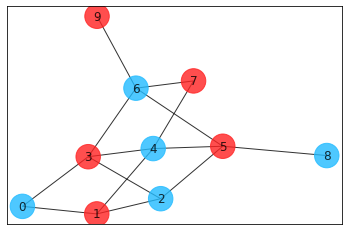

In [21]:
# create minimum eigen optimizer based on VQE
vqe_optimizer = MinimumEigenOptimizer(vqe)

# solve quadratic program
result = vqe_optimizer.solve(qp)
print(result)

colors = ['#ff2222' if result.x[i] == 0 else '#22bbff' for i in range(n)]
nx.draw_networkx(G, node_color=colors, node_size=600, alpha = .8, pos=pos)